In [29]:
import sys
import os
import statistics
import math
import json
import matplotlib.pyplot as plt

from collections import defaultdict

In [30]:
sys.path.append("..")

In [31]:
from src.data import CARCADataset, load_attrs, load_ctx, load_profiles, set_datapath

In [32]:
def get_item_profiles(profile_file: str):
    user_ids, item_ids = set(), set()
    profiles = defaultdict(list)

    with open(profile_file, "r") as df:
        for line in df:
            values = line.strip().split(" ")
            user_id, item_id = int(values[0]), int(values[1])
            user_ids.add(user_id)
            item_ids.add(item_id)
            profiles[item_id].append(user_id)

    return profiles

In [33]:
DATASET = "musical_instruments"
MODE = "all"

In [34]:
os.makedirs(f"../analysis/{DATASET}", exist_ok=True)

In [35]:
set_datapath(f"../../data/{DATASET}/")

In [36]:
user_ids, item_ids, profiles = load_profiles(f"profiles_{MODE}.txt")

In [37]:
item_profiles = get_item_profiles(f"../../data/{DATASET}/profiles_{MODE}.txt")

In [38]:
edges = set()

for k, v in profiles.items():
    for i in v:
        edges.add((k, i))

In [39]:
sparsity = len(edges) / (len(user_ids) * len(item_ids)) * 100

In [49]:
interactions = sum(len(p) for p in profiles.values())
multi_sess = sum(len(p) > 1 for p in profiles.values())
avg_l = statistics.mean(len(p) for p in profiles.values())
std_l = statistics.stdev(len(p) for p in profiles.values())
max_l = max(len(p) for p in profiles.values())
min_l = min(len(p) for p in profiles.values())

In [41]:
v_labels = list(range(1, 51))
v_counts = [sum(len(p) == i for p in profiles.values()) for i in range(1, 51)]

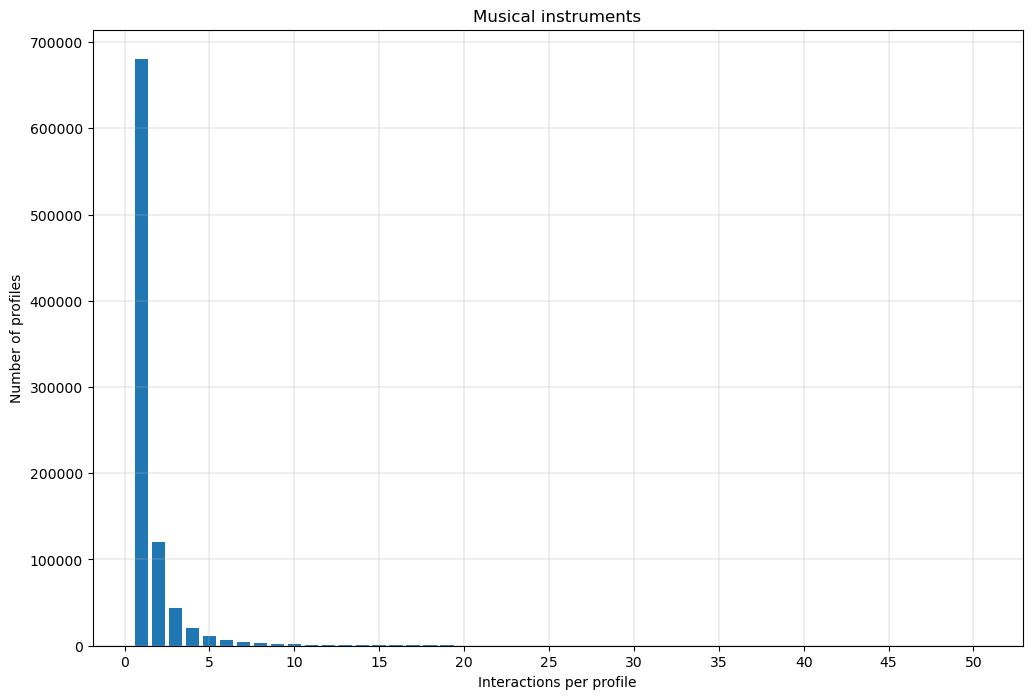

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.bar(v_labels, v_counts)
ax.set(xlabel="Interactions per profile", ylabel="Number of profiles", title=DATASET.replace("_", " ").capitalize())
ax.set_xticks([i * 5 for i in range(11)])
ax.grid(linewidth=0.3)

In [43]:
fig.savefig(fname=f"../analysis/{DATASET}/seq_len_dist_{MODE}.png")

In [44]:
i_labels = list(range(1, 51))
i_counts = [sum(len(p) == i for p in item_profiles.values()) for i in range(1, 51)]

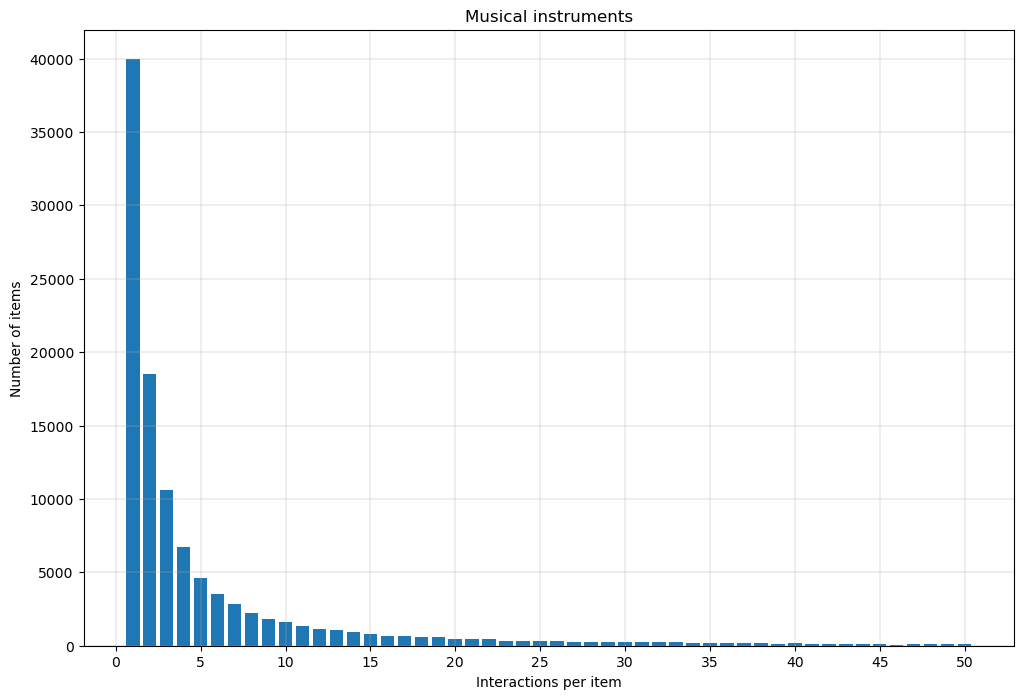

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.bar(i_labels, i_counts)
ax.set(xlabel="Interactions per item", ylabel="Number of items", title=DATASET.replace("_", " ").capitalize())
ax.set_xticks([i * 5 for i in range(11)])
ax.grid(linewidth=0.3)

In [46]:
fig.savefig(fname=f"../analysis/{DATASET}/item_len_dist_{MODE}.png")

In [50]:
print(f"# sessions - {len(profiles)}; # sessions > 1 - {multi_sess}; Average length - {avg_l}; Std - {std_l}; Max - {max_l}; Min - {min_l}")

# sessions - 903050; # sessions > 1 - 222687; Average length - 1.6303892364763857; Std - 2.2641425194179425; Max - 485; Min - 1


In [52]:
kvtable = {
    "users": len(user_ids),
    "items": len(item_ids),
    "interactions": interactions,
    "sparsity (%)": round(sparsity, 6),
    "avg_len": round(avg_l, 6),
    "std": round(std_l, 6),
    "max": max_l,
    "min": min_l
}

In [53]:
with open(f"../analysis/{DATASET}/stats_{MODE}.json", "w") as f:
    f.write(json.dumps(kvtable))